## COVID - 19 Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from dateutil.relativedelta import relativedelta
from datetime import timedelta
%matplotlib inline

In [2]:
df_PCR=pd.read_excel(r'G:\My Drive\My Data sets for modeling\dbo_ip_PCRPositives (14).xlsx')

In [4]:
df_PCR.drop(['Work Place','History Of Travel', 'Onset Of Symptom', 'Asymptomatic',
       'MeasuredFever', 'Subjective Fever', 'Chills', 'Muscle Aches',
       'Runny Nose', 'Sore Throat', 'Cough', 'Shortness Of Breath',
       'Nausea Or Vomiting', 'Headache', 'Abdominal Pain', 'Diarrhea',
       'Loss Of Smell', 'Loss Of Taste', 'Congestion', 'Fatigue', 'Others',
       'Other Symptoms Note:', 'Underlying Conditions', 'Ig G1', 'Ig M1',
       'Lab1 Collection Date','Ig G2', 'Ig M2',
       'Lab2 Collection Date','Ig G3', 'Ig M3',
       'Lab3 Collection Date', 'Comment1', 'Comment2', 'RSNum','Schools', 'Logged Rec Date', 'Admittance Date',
       'Discharge Date','Antigen1','Antigen2','Antigen3','Total Days Sick','Date Of Recovery','Log Date','Date Of Report' ],axis=1,inplace=True)

In [5]:
df_PCR.columns

Index(['Ip ID', 'Tracking ID', 'Residence Type', 'Occupation',
       'Race/Ethnicity', 'Race', 'Ethnicity', 'Current Sex', 'Date Of Birth',
       'Age Group', 'Hospitalized During Illness', 'Current Disposition',
       'Date Of Expiration', 'Transmission Type', 'Date Of Test',
       'Case Definition', 'PCR1', 'PCR2', 'PCR3'],
      dtype='object')

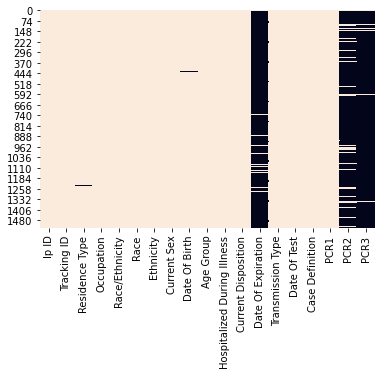

In [6]:
sns.heatmap(df_PCR.notnull(),cbar=False)

In [7]:
df_PCR[['PCR2','PCR3']].fillna('Not done',inplace=True)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### Daily cases for PCR positives

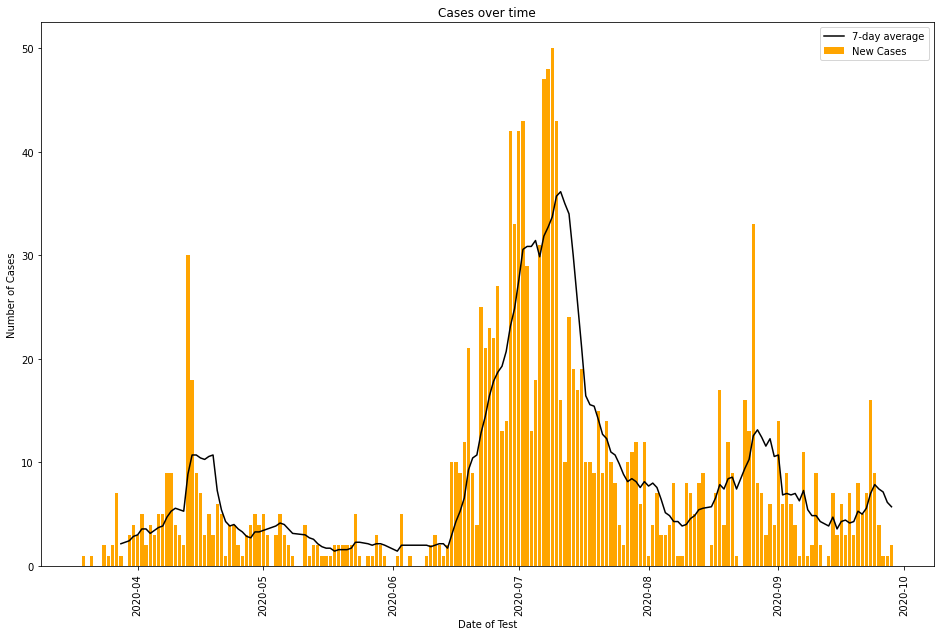

In [9]:
df_PCR['Date Of Test']=pd.to_datetime(df_PCR['Date Of Test'])

df_PCR['PCR_TEST']=np.where((df_PCR['PCR1']=='Positive') | (df_PCR['PCR2']=='Positive')| (df_PCR['PCR2']=='Positive'),1,0)


plt.figure(figsize=(16,10))
plt.bar(df_PCR['Date Of Test'],df_PCR.groupby('Date Of Test').PCR_TEST.cumsum(),color='orange')

plt.plot(df_PCR.groupby(df_PCR['Date Of Test']).PCR_TEST.sum().index,
       df_PCR.groupby(df_PCR['Date Of Test']).PCR_TEST.sum().rolling(window=7).mean(),color='black')
plt.legend(['7-day average','New Cases'])

plt.xlabel('Date of Test')
plt.ylabel('Number of Cases')
plt.title('Cases over time')
plt.xticks(rotation=90)
plt.show()

### Runing totals for PCR positives

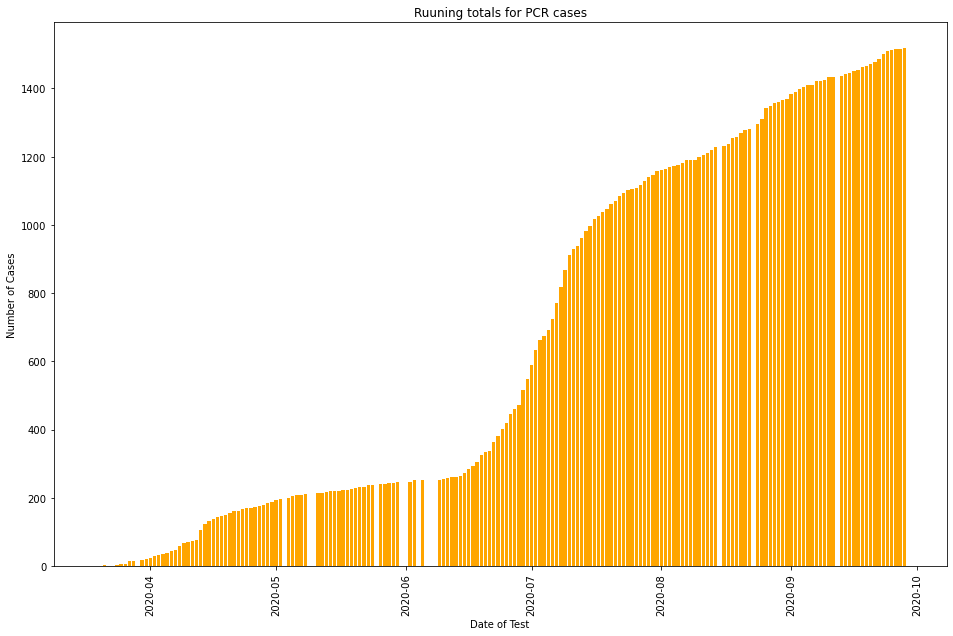

In [17]:
df_2=df_PCR.groupby(df_PCR['Date Of Test']).PCR_TEST.sum()
df=df_2.to_frame(name='Test').reset_index()

plt.figure(figsize=(16,10))
plt.bar(df['Date Of Test'],df.Test.cumsum(),color='orange')
plt.xlabel('Date of Test')
plt.ylabel('Number of Cases')
plt.title('Ruuning totals for PCR cases')
plt.xticks(rotation=90)
plt.show()

### Summary

In [11]:
print('Cases     :',df_PCR[df_PCR['PCR_TEST']==1].PCR_TEST.count())

print('Recovered :',df_PCR[(df_PCR['Current Disposition']=='Unknown/Lost to followup') 
                         | (df_PCR['Current Disposition']=='Recovered') ]['Current Disposition'].count())

print('Active    :',df_PCR[(df_PCR['Current Disposition']=='Hospitalized') 
                         | (df_PCR['Current Disposition']=='Self-Isolated') ]['Current Disposition'].count())

print('Deaths    :',df_PCR[df_PCR['Current Disposition']=='Expired']['Current Disposition'].count())




Cases     : 1531
Recovered : 1348
Active    : 136
Deaths    : 49


### Cases by age group

In [12]:
df_PCR.dropna(subset=['Date Of Birth'],inplace=True)

df_PCR['Date Of Birth']=pd.to_datetime(df_PCR['Date Of Birth'])

df_PCR['AGE']=(df_PCR['Date Of Test']-df_PCR['Date Of Birth'])

df_PCR['AGE']=(df_PCR['Date Of Test']-df_PCR['Date Of Birth'])//timedelta(days=365.2422 )

In [13]:
condition=[(df_PCR['AGE']>=0)  & (df_PCR['AGE']<20),
           (df_PCR['AGE']>=20) & (df_PCR['AGE']<30),
           (df_PCR['AGE']>=30) & (df_PCR['AGE']<40),
           (df_PCR['AGE']>=40) & (df_PCR['AGE']<50),
           (df_PCR['AGE']>=50) & (df_PCR['AGE']<60),
           (df_PCR['AGE']>=60) & (df_PCR['AGE']<70),
           (df_PCR['AGE']>=70)]

values=['0-19','20-29','30-39','40-49','50-59','60-69','70+']

df_PCR['Age Category']=np.select(condition,values)

In [14]:
df_PCR.drop(df_PCR[df_PCR['Age Category']=='0'].index,inplace=True)

df_3=df_PCR['Age Category'].value_counts()

df4=pd.DataFrame(df_3).sort_index()

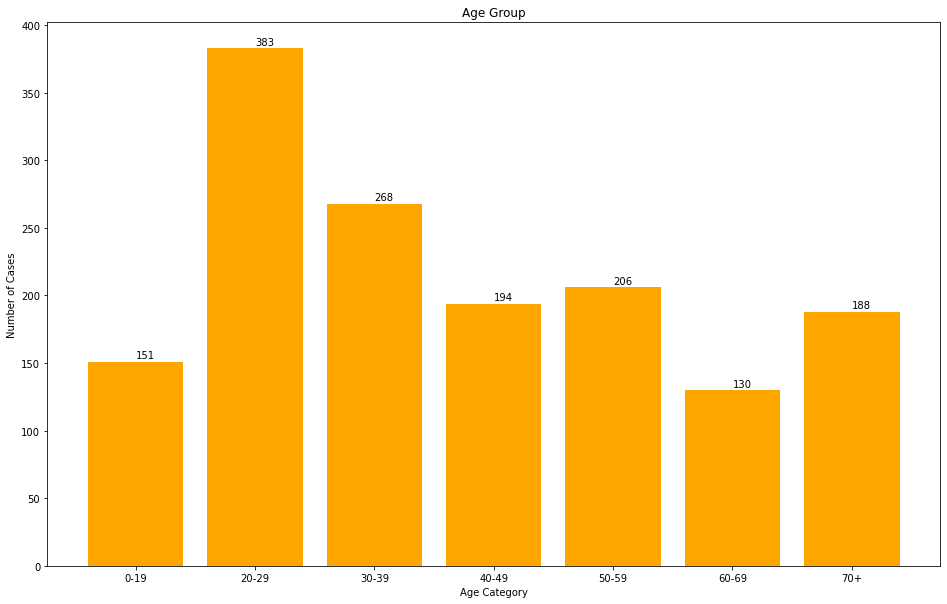

In [16]:
fig,ax=plt.subplots(figsize=(16,10))

ax.bar(df4['Age Category'].index,df4['Age Category'].values,color='orange')
plt.xlabel('Age Category')
plt.ylabel('Number of Cases')
plt.title('Age Group')

for i,v in enumerate(df4['Age Category'].values):
    ax.text(i,v+2.5,str(v))

plt.show()

### Cases by school age group

In [18]:
condition_2=[(df_PCR['AGE']>=0)  & (df_PCR['AGE']<=4),
             (df_PCR['AGE']>4)  & (df_PCR['AGE']<=10),
             (df_PCR['AGE']>10) & (df_PCR['AGE']<=14),
             (df_PCR['AGE']>14) & (df_PCR['AGE']<20),
             (df_PCR['AGE']>=20)]

value_2=['Pre-K','Elementary','Middle School','High School','Not Valied']

df_PCR['School Age']=np.select(condition_2,value_2)

df_PCR[df_PCR['School Age']!='Not Valied']['School Age'].value_counts()

High School      95
Pre-K            28
Middle School    16
Elementary       12
Name: School Age, dtype: int64

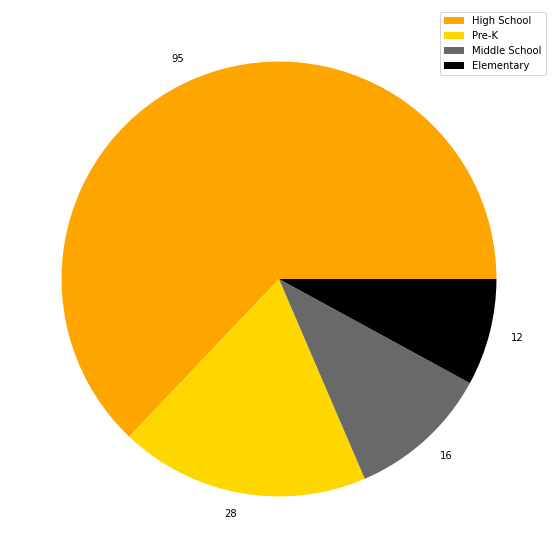

In [35]:
fig,ax=plt.subplots(figsize=(16,10))
colors = ["orange", "gold", "dimgray", "black"]

plt.pie(df_PCR[df_PCR['School Age']!='Not Valied']['School Age'].value_counts().values,
        labels=df_PCR[df_PCR['School Age']!='Not Valied']['School Age'].value_counts().values,colors=colors )    
plt.legend(labels=df_PCR[df_PCR['School Age']!='Not Valied']['School Age'].value_counts().index,loc=1)
plt.show()

### Count by occupation

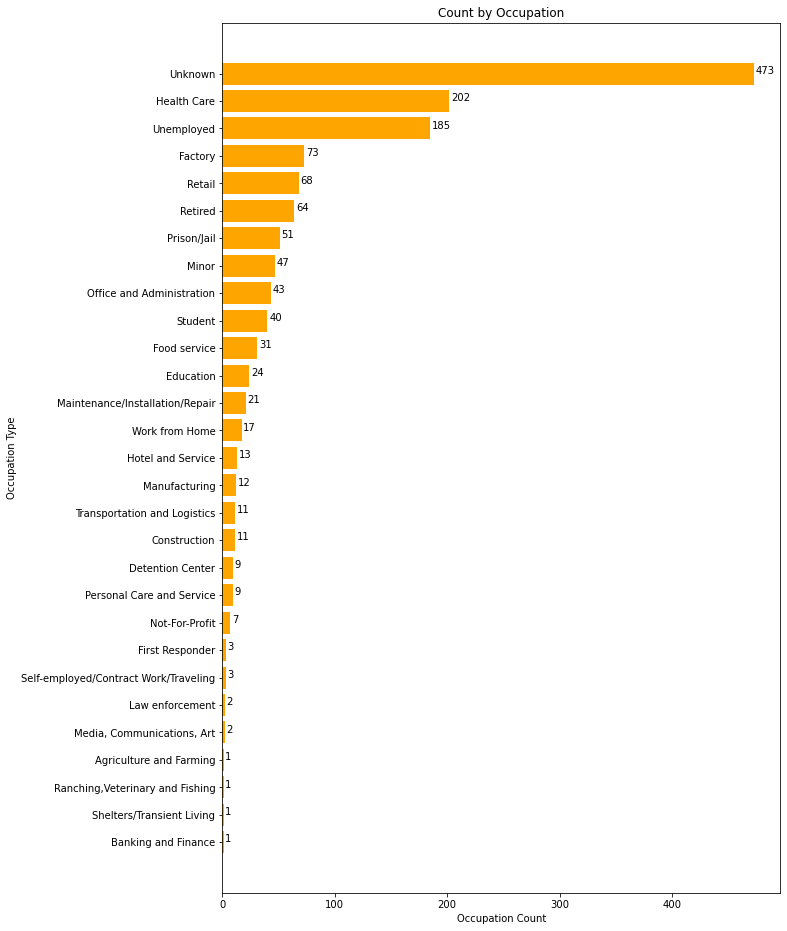

In [21]:
fig, ax =plt.subplots(figsize=(10,16))
plt.barh(df_PCR[df_PCR['Occupation']!='Military'].Occupation.value_counts().sort_values().index,
         df_PCR[df_PCR['Occupation']!='Military'].Occupation.value_counts().sort_values().values,
         color='orange')
plt.xlabel('Occupation Count')
plt.ylabel('Occupation Type')
plt.title('Count by Occupation')

for i,v in enumerate(df_PCR[df_PCR['Occupation']!='Military'].Occupation.value_counts().sort_values()):
    ax.text(v+1.5,i,str(v))
plt.show()

### Ethinicity by sex

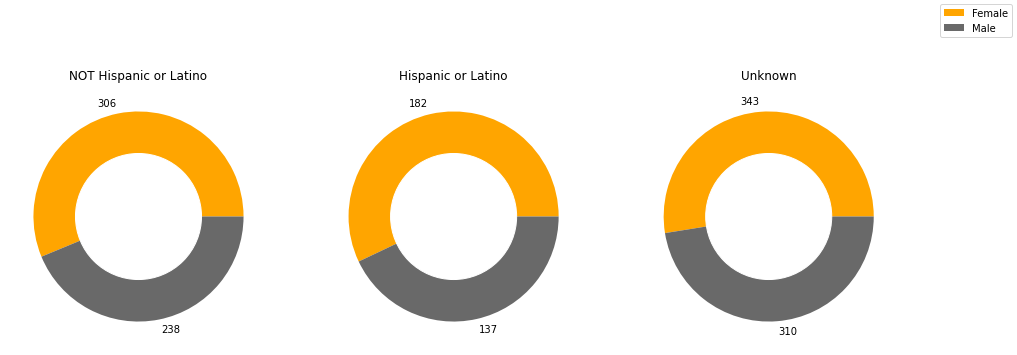

In [38]:
fig = plt.figure(figsize=(16,6))
colors=["orange", "dimgray"]


plt.subplot(1, 3, 1)
plt.pie(df_PCR[df_PCR['Ethnicity']=='NOT Hispanic or Latino'].groupby('Current Sex').PCR_TEST.sum().values,
        labels=df_PCR[df_PCR['Ethnicity']=='NOT Hispanic or Latino'].groupby('Current Sex').PCR_TEST.sum().values,colors=colors)  

plt.title('NOT Hispanic or Latino')
center_circle_1=plt.Circle((0,0),0.6,color='w')
fig=plt.gcf()
fig.gca().add_artist(center_circle_1)

plt.subplot(1, 3, 2)
plt.pie(df_PCR[df_PCR['Ethnicity']=='Hispanic or Latino'].groupby('Current Sex').PCR_TEST.sum().values,
        labels=df_PCR[df_PCR['Ethnicity']=='Hispanic or Latino'].groupby('Current Sex').PCR_TEST.sum().values,colors=colors)  

plt.title('Hispanic or Latino')
center_circle_1=plt.Circle((0,0),0.6,color='w')
fig=plt.gcf()
fig.gca().add_artist(center_circle_1)


plt.subplot(1, 3, 3)
plt.pie(df_PCR[df_PCR['Ethnicity']=='Unknown'].groupby('Current Sex').PCR_TEST.sum().values,
        labels=df_PCR[df_PCR['Ethnicity']=='Unknown'].groupby('Current Sex').PCR_TEST.sum().values,colors=colors) 

plt.title('Unknown')

center_circle_1=plt.Circle((0,0),0.6,color='w')

fig=plt.gcf()

fig.gca().add_artist(center_circle_1)

fig.legend(labels=df_PCR[df_PCR['Ethnicity']=='Unknown'].groupby('Current Sex').PCR_TEST.sum().index,loc=1)

plt.show()